(256, 256)


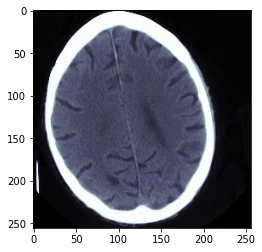

In [1]:
from fastai.vision.all import *
import numpy as np
import pandas as pd
import pydicom
from matplotlib import pyplot as plt
from path import Path
import glob
from PIL import Image
im = np.array(Image.open(r"C:\Users\L\Downloads\archive\train_jpg\train_jpg\ID_2dfa9f6f8.jpg").convert('L'))
print(im.shape)
plt.imshow(im, cmap=plt.cm.bone);

In [2]:
fn = get_image_files(r"C:\Users\L\Downloads\archive\train_jpg\train_jpg")
len(fn)

194082

In [3]:
root = Path(r'C:\Users\L\Downloads\archive\meta\meta')
df = pd.read_feather(root / 'comb.fth')
df.head()
df.shape

(674257, 48)

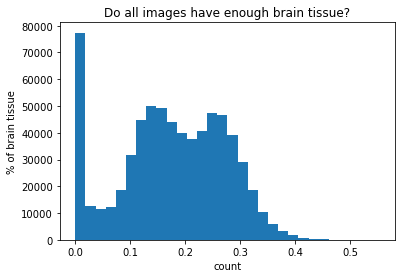

In [4]:
plt.hist(df['img_pct_window'], 30)
plt.xlabel('count')
plt.ylabel('% of brain tissue')
plt.title('Do all images have enough brain tissue?');

In [5]:
trn_path = Path(r'train_jpg/train_jpg')
csv_path = Path('meta/meta')

In [6]:
fn = get_image_files(trn_path)
len(fn)
labels = pd.read_feather(csv_path + '/labels.fth')
labels.head()

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000039fa0,0,0,0,0,0,0
1,ID_00005679d,0,0,0,0,0,0
2,ID_00008ce3c,0,0,0,0,0,0
3,ID_0000950d7,0,0,0,0,0,0
4,ID_0000aee4b,0,0,0,0,0,0


In [7]:
labels.head()
# for x in range(194082):
#     labels['ID'][x] += '.jpg'
labels['ID'] += '.jpg'

In [8]:
fn=np.array(fn)
fn_df=pd.DataFrame(fn, columns=['ID'])

In [9]:
fn_df.head()
fn_df.shape

(194082, 1)

In [10]:
fn_df['ID'] = fn_df['ID'].apply(lambda x: str(x)[20:])

In [11]:
fn_df['ID'].head()

0    ID_00008ce3c.jpg
1    ID_0000aee4b.jpg
2    ID_0002003a8.jpg
3    ID_0002081b6.jpg
4    ID_00027cbb1.jpg
Name: ID, dtype: object

In [12]:
fn_df.shape

(194082, 1)

In [13]:
labels.shape

(674258, 7)

In [14]:
new=pd.merge(labels, fn_df, how='inner', on=['ID'])

In [15]:
new.head()

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_00008ce3c.jpg,0,0,0,0,0,0
1,ID_0000aee4b.jpg,0,0,0,0,0,0
2,ID_0002003a8.jpg,0,0,0,0,0,0
3,ID_0002081b6.jpg,1,0,1,0,0,0
4,ID_00027cbb1.jpg,0,0,0,0,0,0


In [16]:
dls = ImageDataLoaders.from_df(new, trn_path, bs = 256, seed = 42)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [17]:
dls.bs

256

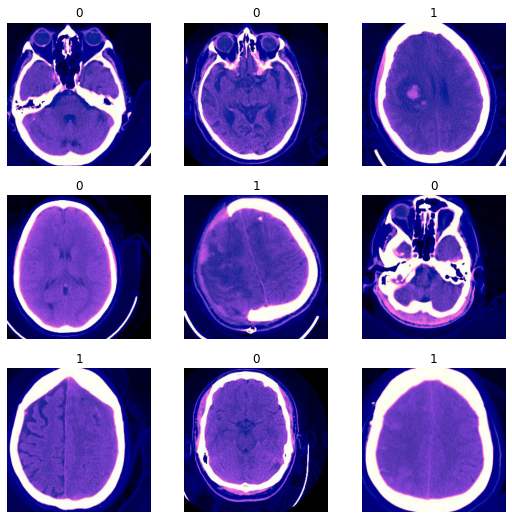

In [18]:
dls.show_batch()

In [19]:
len(dls.train_ds)

155266

In [20]:
print(dls.train_ds)

(#155266) [(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(1)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(1)),(PILImage mode=RGB size=256x256, TensorCategory(1)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0))...]


In [21]:
new['epidural'] = new['epidural'].replace({1: 'epidural'})
new['intraparenchymal'] = new['intraparenchymal'].replace({1: 'intraparenchymal'})
new['intraventricular'] = new['intraventricular'].replace({1: 'intraventricular'})
new['subarachnoid'] = new['subarachnoid'].replace({1: 'subarachnoid'})
new['subdural'] = new['subdural'].replace({1: 'subdural'})

In [22]:
new.head()

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_00008ce3c.jpg,0,0,0,0,0,0
1,ID_0000aee4b.jpg,0,0,0,0,0,0
2,ID_0002003a8.jpg,0,0,0,0,0,0
3,ID_0002081b6.jpg,1,0,intraparenchymal,0,0,0
4,ID_00027cbb1.jpg,0,0,0,0,0,0


In [23]:
new['any'] = new['epidural'].map(str) + ' ' + new['intraparenchymal'].map(str) + ' ' + new['intraventricular'].map(str) + ' ' + new['subarachnoid'].map(str) + ' ' + new['subdural'].map(str)
new['any'] = new['any'].str.replace('\d+', '')
new.head()
# classes = ['epidural','intraparenchymal','intraventricular','subarachnoid','subdural']
# new['any']=''
# for i in classes:
#     np.where(new[i].map(str)==0, new['any'], new['any'].map(str)==new[i].map(str)+new['any'].map(str))

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_00008ce3c.jpg,,0,0,0,0,0
1,ID_0000aee4b.jpg,,0,0,0,0,0
2,ID_0002003a8.jpg,,0,0,0,0,0
3,ID_0002081b6.jpg,intraparenchymal,0,intraparenchymal,0,0,0
4,ID_00027cbb1.jpg,,0,0,0,0,0


In [24]:
count=new['any'].value_counts()
print(count)

                                                                    97041
    subdural                                                        28862
   subarachnoid                                                     14710
 intraparenchymal                                                   13925
  intraventricular                                                   8914
 intraparenchymal intraventricular                                   6330
   subarachnoid subdural                                             4653
 intraparenchymal  subarachnoid                                      3611
  intraventricular subarachnoid                                      3226
 intraparenchymal   subdural                                         2952
 intraparenchymal  subarachnoid subdural                             2017
 intraparenchymal intraventricular subarachnoid                      1761
epidural                                                             1497
  intraventricular  subdural          

In [25]:
new = new.drop(['epidural', 'intraparenchymal', 'intraventricular',
       'subarachnoid', 'subdural'], axis = 1)
new.head()

,ID,any
0,ID_00008ce3c.jpg,
1,ID_0000aee4b.jpg,
2,ID_0002003a8.jpg,
3,ID_0002081b6.jpg,intraparenchymal
4,ID_00027cbb1.jpg,


In [28]:
newnew=pd.merge(fn_df, new, on=['ID'])
newnew['any'] = newnew['any'].fillna('Healthy')

In [29]:
newnew.head()

,ID,any
0,ID_00008ce3c.jpg,
1,ID_0000aee4b.jpg,
2,ID_0002003a8.jpg,
3,ID_0002081b6.jpg,intraparenchymal
4,ID_00027cbb1.jpg,


In [30]:
count=newnew['any'].value_counts()
print(count)

                                                                    97041
    subdural                                                        28862
   subarachnoid                                                     14710
 intraparenchymal                                                   13925
  intraventricular                                                   8914
 intraparenchymal intraventricular                                   6330
   subarachnoid subdural                                             4653
 intraparenchymal  subarachnoid                                      3611
  intraventricular subarachnoid                                      3226
 intraparenchymal   subdural                                         2952
 intraparenchymal  subarachnoid subdural                             2017
 intraparenchymal intraventricular subarachnoid                      1761
epidural                                                             1497
  intraventricular  subdural          